# Assingment 4 

### Exercise 2

In [1]:
using InstantiateFromURL
activate_github("QuantEcon/QuantEconLecturePackages", tag="v0.3.1");
using LinearAlgebra, Statistics, Compat, Plots

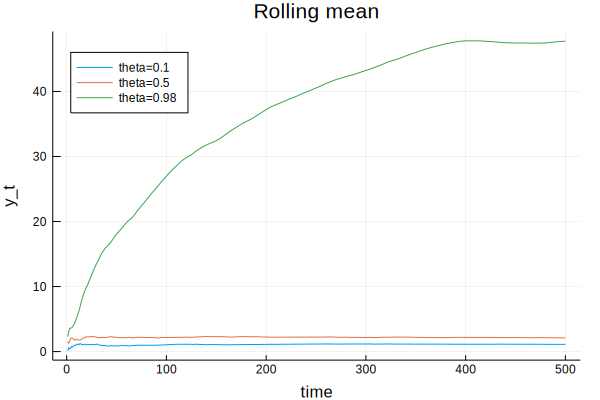

In [2]:
using Parameters
parameters=(γ=1.0, σ=1.0, y0=0.0, t=500,n=500,size_theta=3) #Set t=500 to get convergence, n=500 to smooth distr.
θ_v=[0.1,0.5,0.98]

f(y,θ,γ,σ)=γ+θ*y+σ*randn() #Mapping from yt to yt+1

function simulation(θ) #Simulates AR(1) process, with y0 as initial value
    @unpack γ, σ, y0, t= parameters
    y=zeros(t+1)
    y[1]=y0
    [y[i+1]=f(y[i],θ,γ,σ) for i in 1:t]
    return y=y[2:t+1]
end

function cmean(y,a,b) #Calculates rolling mean(RM) of y, with a as the initial observation and b as the last one
    mean(y[a:b])
end

function plotcmean(y,a=1) #Plots rolling mean of columns of y, with a as initial value for rolling mean
    @unpack t,size_theta= parameters    
    p=[cmean(y[j,1],a,i) for i in 1:t, j in 1:size_theta] #Calculates RM for 1:t for each column of y
    plot(1:t,p, title="Rolling mean", label=["theta=$(θ_v[j])" for j in 1:size_theta], 
        legend=:topleft, xlabel="time", ylabel="y_t")
end

plotcmean(simulation.(θ_v))

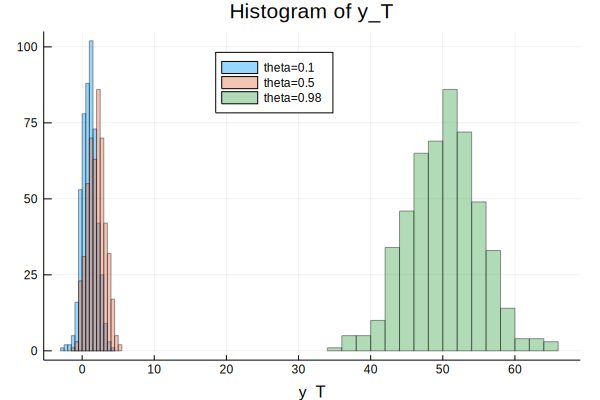

In [3]:
function replications(θ) #Replicates the simulation of AR(1) process
    @unpack t,n=parameters
    reps=zeros(t,n) #Storages results, each simulation is a column
   [reps[:,i]=simulation(θ) for i in 1:n]
    yt=reps[t,:] #Returns the final values of each simulation
end

histogram(replications.(θ_v), title="Histogram of y_T", #Histogram of final values, for each value of theta
    label=["theta=$(θ_v[j])" for j in 1:3], legend=:top, xlabel="y_T",alpha=0.4)

In [4]:
function mvar(θ) #Calculates mean and variance of final values
    @unpack n=parameters
    y=replications(θ)
    mean=sum(y)/n #I wasn't sure if I could the commands, so I calculate the mean and variance directly
    variance=sum(y.^2)/n-mean^2
    return text=("When θ=$θ, the mean is $mean and the variance is $variance")
end

mvar.(θ_v)

3-element Array{String,1}:
 "When θ=0.1, the mean is 1.1180799198753182 and the variance is 1.0645868420405764"
 "When θ=0.5, the mean is 2.015140254517396 and the variance is 1.337755818418171"  
 "When θ=0.98, the mean is 49.78302579283641 and the variance is 25.00892843193742" 

### Exercise 3

In [ ]:
parameters=(a=0.1,b=0.2,c=0.5,d=1.0,σ=0.1,n=50,k=5,m=100) # k=# of parameters; set m=100 to have more reps.
n_parameters=["a", "b", "c", "d","theta", "n", "np", "m"]

function simulation() #Simulate the data
    @unpack a,b,c,d,σ,n,k= parameters
    beta=[a, b ,c, d, σ]
    x1=randn(n)
    x2=randn(n)
    x=[x1 x1.^2 x2 ones(n)]
    w=randn(n)
    y=x*beta[1:k-1]+beta[k]*w
    return(y=y, x=x)
end

function ols() #Calculates OLS using simulated data
    @unpack n,k= parameters
    y,x=simulation() #Possible to include other dataset
    β=zeros(k)
    β[1:k-1]=x'x\x'y #Estimation of coefficients
    β[k]=sqrt(sum((y-x*β[1:k-1]).^2)/(n-1)) #Estimates variance of errors
    return β
end

@show ols() #just to check

function rep_p()
    @unpack n,k,m= parameters
    β_m=zeros(k,m) #Matrix to storage results, with m repitition. Each repitition is a column
    [β_m[:,i]=ols() for i in 1:m]
    return β_m
end


l = @layout [  a{0.3w} [b{0.5h} c{0.5h}; #To deal with 5 subplots
                         d{0.5h} e{0.5h}]]

function hist_p(y) #Histrogram of parameters
    @unpack k= parameters
    histogram([y[p,:] for p in 1:k], layout=l,
    title = ["$(n_parameters[p])" for j = 1:1, p=1:k], legend=false, xtickfont = font(5))
end

hist_p(rep_p()) #Histrogram of parameters, values obtaiend from m repetitions of the estimation